In [1]:
import getdataframe
import pandas as pd
import matplotlib.pyplot as plt
cache_path = "../../data/sensor_cache/"

Data is pulled down using the sensor ID and a path to where the csv files are to be stored

In [2]:
id = 930429
getdataframe.build_df(id, cache_path)

All items returned


csv files can be opened and loaded into a dataframe using the get_df() function

In [3]:
feeds = getdataframe.get_df(id, cache_path)

In [4]:
feeds.head()
feeds.tail()

,entry_id,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Latitude,Longitude,Battery Voltage,GpsData
created_at,,,,,,,,,
2020-03-18T14:12:44Z,5030,22.33,23.48,22.03,27.05,0.0,0.0,3.94,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T14:14:08Z,5031,22.30,24.35,23.72,24.68,0.0,0.0,3.93,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T14:15:31Z,5032,18.27,20.63,19.52,21.20,0.0,0.0,3.93,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T14:16:53Z,5033,21.80,24.55,22.37,26.10,0.0,0.0,3.93,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T14:18:17Z,5034,22.75,24.02,24.03,26.72,0.0,0.0,3.93,"0.000000,0.000000,00000000.00,1109367000000000..."


Pollution data can be reshaped from the dataframe to aid analysis

In [5]:
pm_data = getdataframe.get_pollution(id, feeds)

In [6]:
pm_data.head()
pm_data.tail()

PM10  PM2.5
sensor_id created_at                sensortype              
930429    2020-03-18 14:15:31+00:00 Sensor2     21.20  19.52
          2020-03-18 14:16:53+00:00 Sensor1     24.55  21.80
                                    Sensor2     26.10  22.37
          2020-03-18 14:18:17+00:00 Sensor1     24.02  22.75
                                    Sensor2     26.72  24.03

We can drop the PM10 column and get an hourly average for the data set

In [7]:
sensor_hourly = pm_data.drop("PM10", axis=1)
sensor_hourly = sensor_hourly.groupby("sensortype")["PM2.5"].resample("H", level=1).mean()

We can then plot with just references to the required sensor

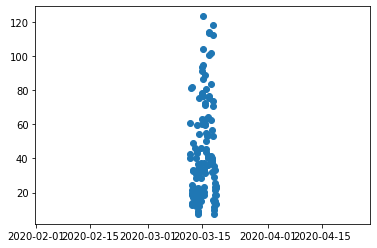

In [8]:
plt.scatter(sensor_hourly["Sensor1"].index, sensor_hourly["Sensor1"])


As the time field is in datetime format, pandas can index it with given dates. For example to get all results for Dec 2019

In [9]:
plt.scatter(sensor_hourly["Sensor1"]["2019-12"].index, 
            sensor_hourly["Sensor1"]["2019-12"])
plt.scatter(sensor_hourly["Sensor2"]["2019-12"].index, 
            sensor_hourly["Sensor2"]["2019-12"])

KeyError: '2019-12'

We can check the variability of the sensors against each other

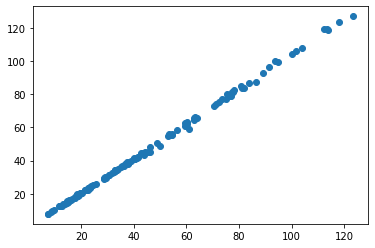

In [10]:
plt.scatter(sensor_hourly["Sensor1"], 
            sensor_hourly["Sensor2"])

(0.8, 1.4)

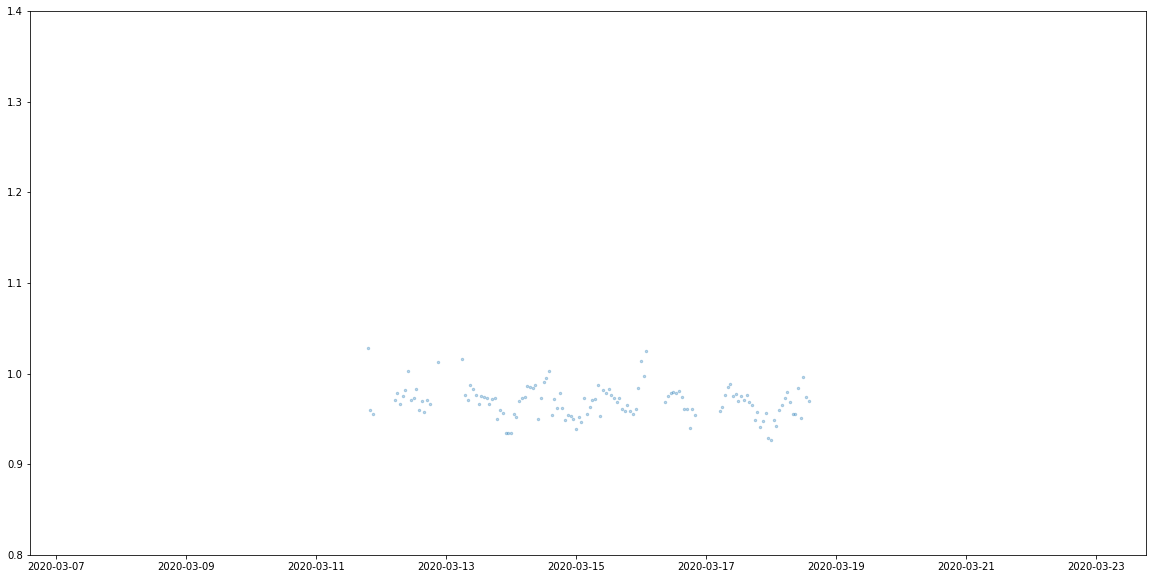

In [11]:
plt.figure(figsize=[20,10])
plt.scatter(sensor_hourly['Sensor1'].index,sensor_hourly["Sensor1"]/sensor_hourly["Sensor2"],6,alpha=0.3)
plt.ylim([0.8,1.4])